In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [31]:
corr_pear = df.loc[:,'satisfaction_level':'time_spend_company'].corr()

In [32]:
corr_pear

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


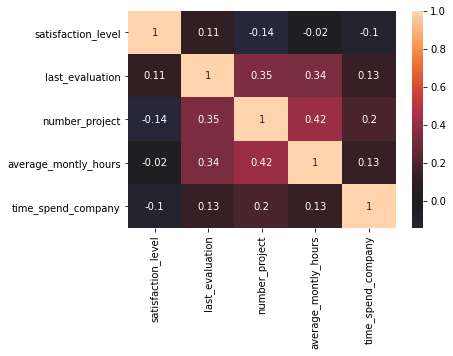

In [33]:
heatmap_plot = sns.heatmap(corr_pear, center=0, annot=True)

# Коэффициент корреляции Пирсона
Наибольшая корреляция между average_montly_hours и number_project

Наименьшая корреляция между average_montly_hours и satisfaction_level

In [43]:
pd.pivot_table(df, index = 'department', values='satisfaction_level', aggfunc='count')

,satisfaction_level
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [44]:
pd.pivot_table(df, index = 'salary', values='satisfaction_level', aggfunc='count')

,satisfaction_level
salary,
high,1237
low,7316
medium,6446


In [45]:
pd.pivot_table(df, index = 'department', values='satisfaction_level', aggfunc='count', columns = 'salary')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [55]:
a = df[df['salary'] == 'low'].loc[:,'time_spend_company']

In [56]:
b = df[df['salary'] == 'high'].loc[:,'time_spend_company']

In [59]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-5.827169633335566, pvalue=5.841716283222613e-09)

pvalue меньше 0.05 поэтому мы отклоняем нулевую гипотезу, что связи между зп и временем на работе нет и принимаем альтернативную гипотезу что связь есть

In [70]:
df_pivot = pd.pivot_table(df, index = 'promotion_last_5years', columns = 'left', values='satisfaction_level', aggfunc='count')

In [71]:
df_pivot

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [72]:
df_pivot.loc[1]/(df_pivot.loc[0]+df_pivot.loc[1])

left
0    0.026251
1    0.005321
dtype: float64

доля сотрудников с повышением составляет 2.6% среди не уволившихся

доля сотрудников с повышением составляет 0.5% среди уволившихся

In [75]:
pd.pivot_table(df, columns = 'left', values='satisfaction_level', aggfunc='mean')

left,0,1
satisfaction_level,0.66681,0.440098


средняя степень удовлетворенности:

среди не уволившихся: 0.66

среди уволившихся: 0.44

In [77]:
pd.pivot_table(df, columns = 'left', values='number_project', aggfunc='mean')

left,0,1
number_project,3.786664,3.855503


среднее количество проектов:

среди не уволившихся: 3.79

среди уволившихся: 3.86

In [83]:
df1 = df.drop(['department', 'salary', 'left'], axis = 1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['left'], test_size=0.25)

In [86]:
lda = LinearDiscriminantAnalysis()

In [87]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [88]:
y_predict = lda.predict(X_test)

In [91]:
lda.score(X_test, y_test, sample_weight=None)

0.7626666666666667

точность модели 76%